In [1]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


[Dimension reduction in scikit learn](http://scikit-learn.org/stable/modules/decomposition.html#decompositions)

In [69]:
prevpos = pd.read_csv('./dat/preverb-posit-gyakmx.tsv', delimiter='\t', index_col=0)

In [45]:
prevpos.head()#.describe()

,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8
meg,0,0,2,1225,15,8343,3294,98,17,4,4,0,1,0
el,0,0,2,767,91,4211,1081,40,5,3,1,0,1,2
ki,0,0,1,260,28,1557,478,17,7,2,2,0,1,0
fel,0,1,0,185,26,940,403,16,4,2,2,0,0,0
be,0,0,0,109,12,815,310,14,2,1,0,0,0,0


In [70]:
prevpos['-1'] += prevpos['0']
prevpos['0'] = 0

In [71]:
prevpos['6+'] = prevpos.loc[:,'+6':].sum(axis=1)
prevpos = prevpos.drop(columns=['+6', '+7', '+8'])

In [72]:
prevpos.head()

,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,6+
meg,0,0,2,1225,8358,0,3294,98,17,4,4,1
el,0,0,2,767,4302,0,1081,40,5,3,1,3
ki,0,0,1,260,1585,0,478,17,7,2,2,1
fel,0,1,0,185,966,0,403,16,4,2,2,0
be,0,0,0,109,827,0,310,14,2,1,0,0


In [97]:
def show_labed_mx(mutinfo):
    plt.matshow(mutinfo)
    df = mutinfo
    plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
    plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
    plt.colorbar()
    #plt.xticks([int(posi) for posi in mutinfo.columns.tolist()])

/home/makrai/tool/python/venv3/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


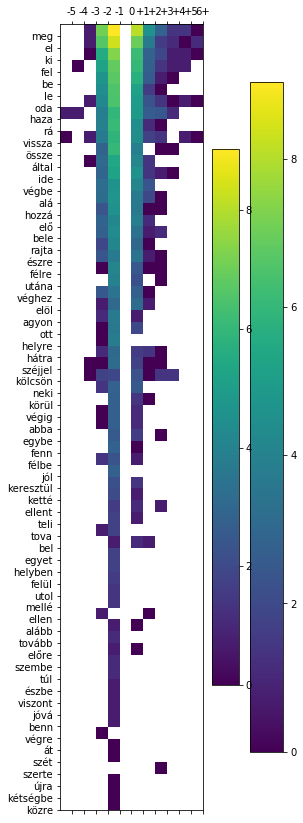

In [101]:
show_labed_mx(np.log(prevpos))
#plt.yticks(prevpos.index.tolist())
plt.colorbar()

In [102]:
mutinfo = prevpos.copy()#.values.astype('float')# + 1
prev_marg = prevpos.sum(axis=1)
posit_marg = prevpos.sum(axis=0)
mutinfo = mutinfo.divide(prev_marg, axis='rows')
mutinfo /= posit_marg#.values
mutinfo = np.log(mutinfo)

/home/makrai/tool/python/venv3/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


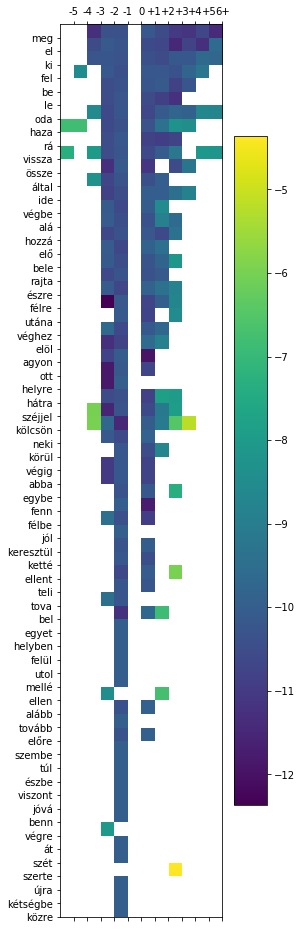

In [103]:
show_labed_mx(mutinfo)

In [17]:
prevproj = pca.fit_transform(provpos.values)

/home/makrai/tool/python/venv3/lib/python3.4/site-packages/matplotlib/collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


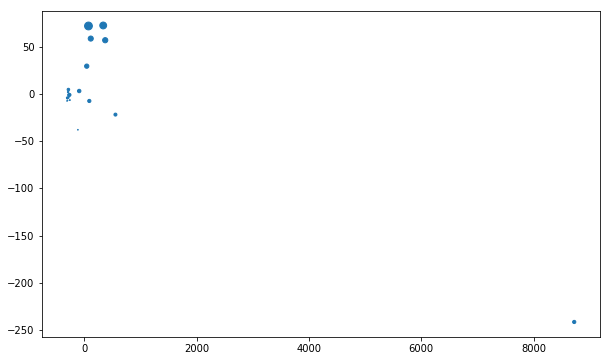

In [23]:
plt.scatter(*prevproj.T)